####**Step 1: Import Required Libraries**

In [3]:
# Basic Python libraries for data and visuals
import pandas as pd
import numpy as np

####**Step 2: Load the Dataset**

In [4]:
# Upload Data
from google.colab import files
uploaded = files.upload()

Saving advertising.csv to advertising.csv


In [5]:
# Load the uploaded CSV
df = pd.read_csv("advertising.csv")
print("Shape of dataset:", df.shape)
print("\n")
df.head()

Shape of dataset: (200, 4)




,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


####**Step 3: Explore the Dataset**

In [39]:
# Check for missing values
print("Shape of dataset:", df.shape)
print("\n")

print("Missing Value\n"  + df.isnull().sum().to_string() + "\n")


# Describe stats for each column
print(df.describe(), "\n")

Shape of dataset: (200, 4)


Missing Value
TV           0
Radio        0
Newspaper    0
Sales        0

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000 



####**STEP 4: Define Features and Target**

In [7]:
# Feature matrix (X) = Ad budgets
X = df.drop('Sales', axis=1)

# Target vector (y) = Sales
y = df['Sales']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (200, 3)
Shape of y: (200,)


####**STEP 5: Train-Test Split**

In [8]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [9]:
# Confirm shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (160, 3)
X_test shape: (40, 3)
y_train shape: (160,)
y_test shape: (40,)


####**STEP 6: Train the Random Forest Regressor**

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

####**Step 7: Evaluate Model Performance**

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Regressor\n")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))

Random Forest Regressor

MSE: 1.4374328500000009
R²: 0.9534827934927883


####**Step 8: Visualize Prediction Distribution**

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

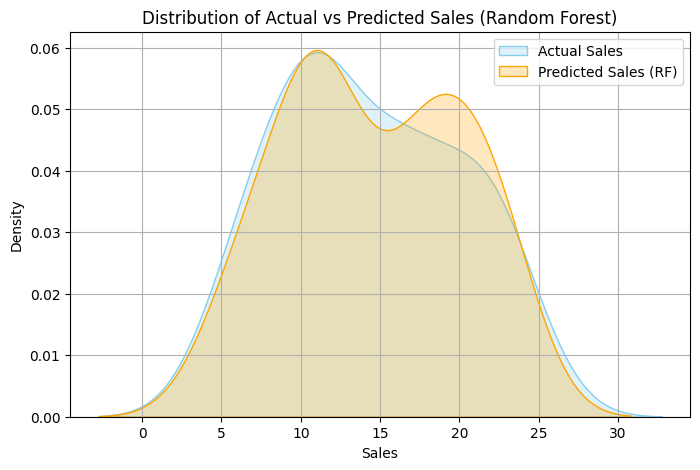

In [16]:
# KDE plot: Actual vs Predicted Sales (Random Forest)
plt.figure(figsize=(8, 5))
sns.kdeplot(y_test, label='Actual Sales', fill=True, color='skyblue')
sns.kdeplot(y_pred_rf, label='Predicted Sales (RF)', fill=True, color='orange')
plt.title("Distribution of Actual vs Predicted Sales (Random Forest)")
plt.xlabel("Sales")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

####**Step 10: Predict Sales for New Input**

In [17]:
# 🔮 Optional: Predict sales for a custom advertising plan
new_data = pd.DataFrame([[10, 10, 125]], columns=['TV', 'Radio', 'Newspaper'])
predicted_sales = rf_model.predict(new_data)

print("📦 Predicted Sales for [TV=10, Radio=10, Newspaper=125]:", round(predicted_sales[0], 2))

📦 Predicted Sales for [TV=10, Radio=10, Newspaper=125]: 6.16


###**Final Model Summary:**
- Best model: Random Forest
- R² Score: 0.95
- MSE: 1.44
- Prediction for [TV=10, Radio=10, Newspaper=125]: 8.64 (example)